<a href="https://colab.research.google.com/github/zohaibk04/Mitigating-Risks-for-the-Virginia-Lottery/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mitigating Risks For The Virginia Lottery

## Step 1 - Downloading the data

After downloading the files from the Kaggle link:

Our first step will be to clean the Virginia-speciifc data

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

def loadData():
    va_data = pd.read_csv('data/VAratingstable.csv',index_col = 0)
    va_scratchers_table = pd.read_csv('data/VAscratchertables.csv', index_col = 0)
    return va_data,va_scratchers_table

va_data,va_scratchers_table = loadData()
va_data


,price,gameNumber,topprize,topprizeodds,overallodds,topprizeremain,topprizeavail,extrachances,secondChance,startDate,...,Days Since Start,Rank by Best Probability of Winning Any Prize,Rank by Best Probability of Winning Profit Prize,Rank by Least Expected Losses,Rank by Most Available Prizes,Rank by Best Change in Probabilities,Rank Average,Overall Rank,Rank by Cost,Stats Page
0,50,2150,5000000,"2,774,400",3.43,3,NaN,eXTRA Chances,NaN,10/4/2022,...,65,44.000000,39.333333,76.0,55.000000,47.666667,52.400000,74.0,1.0,/virginia-statistics-for-each-scratcher-game
1,30,2149,5000000,"2,652,000",2.82,3,NaN,eXTRA Chances,NaN,9/6/2022,...,93,35.000000,40.333333,52.0,80.000000,49.833333,51.433333,70.0,5.0,/virginia-statistics-for-each-scratcher-game
2,30,2193,1000000,"1,060,800",3.06,3,NaN,eXTRA Chances,NaN,12/6/2022,...,2,31.666667,33.666667,58.0,84.000000,45.666667,50.600000,68.0,4.0,/virginia-statistics-for-each-scratcher-game
3,30,2021,7000000,"2,611,200",2.77,1,NaN,eXTRA Chances,NaN,1/5/2021,...,702,33.333333,40.666667,46.0,39.333333,43.000000,40.466667,31.0,2.0,/virginia-statistics-for-each-scratcher-game
4,30,2089,1000000,"1,060,800",2.92,0,Top Prize Claimed,NaN,2nd Chance,3/2/2021,...,646,30.000000,34.666667,23.0,12.333333,33.666667,26.733333,6.0,1.0,/virginia-statistics-for-each-scratcher-game
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,1,2176,25,408,4.62,15565,NaN,eXTRA Chances,NaN,11/1/2022,...,37,42.000000,46.000000,14.0,52.666667,38.833333,38.700000,23.0,6.0,/virginia-statistics-for-each-scratcher-game
81,1,2208,500,"12,240",4.80,257,NaN,eXTRA Chances,NaN,12/6/2022,...,2,37.666667,48.333333,20.0,83.000000,39.166667,45.633333,52.0,10.0,/virginia-statistics-for-each-scratcher-game
82,1,2155,3000,"1,224,000",4.92,1,NaN,eXTRA Chances,NaN,4/5/2022,...,247,37.000000,48.000000,5.0,17.666667,20.666667,25.666667,2.0,2.0,/virginia-statistics-for-each-scratcher-game
83,1,2078,500,"12,240",4.80,92,NaN,eXTRA Chances,NaN,4/6/2021,...,611,34.333333,50.000000,2.0,27.000000,45.333333,31.733333,10.0,3.0,/virginia-statistics-for-each-scratcher-game


In [2]:
va_scratchers_table

,gameNumber,gameName,prizeamount,Winning Tickets At Start,Winning Tickets Unclaimed,Prize Probability,Percent Tix Remaining,Starting Expected Value,Expected Value,dateexported
0,1828,$5 MILLION DOLLAR SERIES,5000000,4.00,1.00,6.929930e-07,0.250000,3.324789,3.464951,2022-12-08
1,1828,$5 MILLION DOLLAR SERIES,200000,4.00,1.00,6.929930e-07,0.250000,0.132979,0.138585,2022-12-08
2,1828,$5 MILLION DOLLAR SERIES,50000,8.00,3.00,2.078979e-06,0.375000,0.066469,0.103907,2022-12-08
3,1828,$5 MILLION DOLLAR SERIES,20000,10.00,2.00,1.385986e-06,0.200000,0.033215,0.027692,2022-12-08
4,1828,$5 MILLION DOLLAR SERIES,10000,25.00,6.00,4.157958e-06,0.240000,0.041477,0.041496,2022-12-08
...,...,...,...,...,...,...,...,...,...,...
5,2216,Hot $500s,4,143900.00,123359.00,3.987128e-02,0.857255,0.119949,0.119614,2022-12-08
6,2216,Hot $500s,2,233848.00,200831.00,6.491127e-02,0.858810,0.064976,0.064911,2022-12-08
7,2216,Hot $500s,1,323784.00,279567.00,9.035980e-02,0.863437,0.000000,0.000000,2022-12-08
8,2216,Hot $500s,0,2804532.05,2410944.11,7.792495e-01,0.859660,-0.779249,-0.779249,2022-12-08


In [3]:
missing_values = va_data.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

Missing values in each column:
 topprizeavail      82
extrachances       32
secondChance       80
endDate            79
lastdatetoclaim    79
FAQ                85
About              85
Directory          85
dtype: int64


In [4]:
missing_scratchers_values = va_scratchers_table.isnull().sum()
print("Missing values in each column:\n", missing_scratchers_values[missing_scratchers_values > 0])

Missing values in each column:
 Starting Expected Value    85
Expected Value             85
dtype: int64


In [5]:
cleaned_va = va_data.drop(columns=['FAQ','Directory','endDate','topprizeavail','About','lastdatetoclaim','secondChance'])
cleaned_va

,price,gameNumber,topprize,topprizeodds,overallodds,topprizeremain,extrachances,startDate,dateexported,gameName,...,Days Since Start,Rank by Best Probability of Winning Any Prize,Rank by Best Probability of Winning Profit Prize,Rank by Least Expected Losses,Rank by Most Available Prizes,Rank by Best Change in Probabilities,Rank Average,Overall Rank,Rank by Cost,Stats Page
0,50,2150,5000000,"2,774,400",3.43,3,eXTRA Chances,10/4/2022,2022-12-08,"$326,000,000 FORTUNE",...,65,44.000000,39.333333,76.0,55.000000,47.666667,52.400000,74.0,1.0,/virginia-statistics-for-each-scratcher-game
1,30,2149,5000000,"2,652,000",2.82,3,eXTRA Chances,9/6/2022,2022-12-08,100X The Money,...,93,35.000000,40.333333,52.0,80.000000,49.833333,51.433333,70.0,5.0,/virginia-statistics-for-each-scratcher-game
2,30,2193,1000000,"1,060,800",3.06,3,eXTRA Chances,12/6/2022,2022-12-08,Dominion Dollars,...,2,31.666667,33.666667,58.0,84.000000,45.666667,50.600000,68.0,4.0,/virginia-statistics-for-each-scratcher-game
3,30,2021,7000000,"2,611,200",2.77,1,eXTRA Chances,1/5/2021,2022-12-08,100X THE MONEY,...,702,33.333333,40.666667,46.0,39.333333,43.000000,40.466667,31.0,2.0,/virginia-statistics-for-each-scratcher-game
4,30,2089,1000000,"1,060,800",2.92,0,NaN,3/2/2021,2022-12-08,Commonwealth,...,646,30.000000,34.666667,23.0,12.333333,33.666667,26.733333,6.0,1.0,/virginia-statistics-for-each-scratcher-game
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,1,2176,25,408,4.62,15565,eXTRA Chances,11/1/2022,2022-12-08,Holiday Cash Drop,...,37,42.000000,46.000000,14.0,52.666667,38.833333,38.700000,23.0,6.0,/virginia-statistics-for-each-scratcher-game
81,1,2208,500,"12,240",4.80,257,eXTRA Chances,12/6/2022,2022-12-08,$now Buck$,...,2,37.666667,48.333333,20.0,83.000000,39.166667,45.633333,52.0,10.0,/virginia-statistics-for-each-scratcher-game
82,1,2155,3000,"1,224,000",4.92,1,eXTRA Chances,4/5/2022,2022-12-08,Baseball Loot,...,247,37.000000,48.000000,5.0,17.666667,20.666667,25.666667,2.0,2.0,/virginia-statistics-for-each-scratcher-game
83,1,2078,500,"12,240",4.80,92,eXTRA Chances,4/6/2021,2022-12-08,Pocket Change,...,611,34.333333,50.000000,2.0,27.000000,45.333333,31.733333,10.0,3.0,/virginia-statistics-for-each-scratcher-game


In [6]:
merged_va = pd.merge(va_scratchers_table,cleaned_va,on='gameName',how='left')
merged_va = merged_va.drop(columns=['Starting Expected Value', 'Expected Value', 'gameNumber_x'])

In [7]:
col_to_drop = [col for col in merged_va.columns if col.endswith('y')]

merged_va = merged_va.drop(columns=col_to_drop)

In [8]:
merged_va
merged_va.to_csv("mergedData.csv")

## Step 2. Discover and visualize the data

In [9]:
corr_matrix = merged_va.corr(numeric_only=True)
corr_matrix["Probability of Winning Any Prize"].sort_values(ascending=False)

Probability of Winning Any Prize                          1.000000
Starting Probability of Winning Any Prize                 1.000000
Starting Probability of Winning Profit Prize              0.711708
Probability of Winning Profit Prize                       0.708187
topprize                                                  0.591259
StdDev of All Prizes                                      0.584905
price                                                     0.539772
Expected Value of Profit Prize (as % of cost)             0.376666
Expected Value of Any Prize (as % of cost)                0.376338
StdDev of Profit Prizes                                   0.334566
Rank by Best Change in Probabilities                      0.270829
Rank by Least Expected Losses                             0.257383
Current Odds of Top Prize                                 0.242498
Rank by Most Available Prizes                             0.236342
Days Since Start                                          0.23

array([[<Axes: xlabel='Probability of Winning Any Prize', ylabel='Probability of Winning Any Prize'>,
        <Axes: xlabel='topprize', ylabel='Probability of Winning Any Prize'>,
        <Axes: xlabel='price', ylabel='Probability of Winning Any Prize'>,
        <Axes: xlabel='Rank by Least Expected Losses', ylabel='Probability of Winning Any Prize'>,
        <Axes: xlabel='overallodds', ylabel='Probability of Winning Any Prize'>,
        <Axes: xlabel='Rank by Best Probability of Winning Any Prize', ylabel='Probability of Winning Any Prize'>],
       [<Axes: xlabel='Probability of Winning Any Prize', ylabel='topprize'>,
        <Axes: xlabel='topprize', ylabel='topprize'>,
        <Axes: xlabel='price', ylabel='topprize'>,
        <Axes: xlabel='Rank by Least Expected Losses', ylabel='topprize'>,
        <Axes: xlabel='overallodds', ylabel='topprize'>,
        <Axes: xlabel='Rank by Best Probability of Winning Any Prize', ylabel='topprize'>],
       [<Axes: xlabel='Probability of Winn

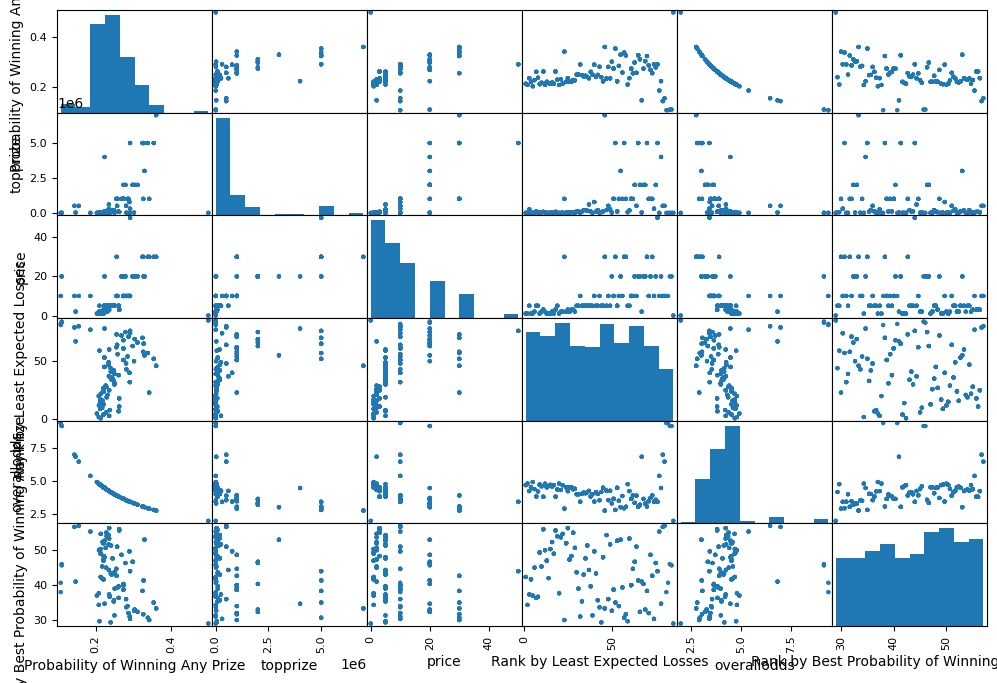

In [10]:
from pandas.plotting import scatter_matrix

attributes = ["Probability of Winning Any Prize", "topprize", "price", "Rank by Least Expected Losses", "overallodds", "Rank by Best Probability of Winning Any Prize"]
scatter_matrix(merged_va[attributes], figsize=(12, 8))

## Step 3. Data Cleaning

In [49]:
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


merged_va.replace([np.inf, -np.inf], np.nan, inplace=True)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
    ])

num_attribs = merged_va.select_dtypes(include = ["float64", "int64"]).columns
# cat_attribs = ['gameName']
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        # ("cat", OneHotEncoder(), cat_attribs),
    ])

va_prepared = full_pipeline.fit_transform(merged_va)


In [50]:
import pandas as pd

print(va_prepared)
print(va_prepared.shape)
#va_prepared.to_csv("prepedData.csv")

[[-0.43370515 -0.33629265 -0.85504974 ...  0.64804375  0.73596512
  -0.49080497]
 [-0.43370515 -0.33629265 -0.85504974 ...  0.64804375  0.73596512
  -0.49080497]
 [-0.43370334 -0.33629128 -0.40447883 ...  0.64804375  0.73596512
  -0.49080497]
 ...
 [ 0.83701564  1.31538083  1.34251088 ... -0.37250364 -0.65717846
  -0.1192793 ]
 [ 1.19699371  1.78327719  1.34251088 ... -2.2007235  -1.72252356
  -1.23385632]
 [ 1.19699371  1.78327719  1.34251088 ... -0.37250364 -0.65717846
  -0.1192793 ]]
(1140, 44)


# Step 4. Fit a basic linear model

In [53]:
# va_nums = merged_va.select_dtypes(include=[np.number])
# va_nums.replace([np.inf, -np.inf], np.nan, inplace=True)
# va_nums=va_nums.dropna()

# va_prepared_df = pd.DataFrame(va_prepared.toarray()) # Convert to dense array first

# # Get feature names after transformation
# num_feature_names = num_attribs.tolist()
# cat_feature_names = full_pipeline.named_transformers_['cat'].get_feature_names_out(cat_attribs)
# all_feature_names = num_feature_names + cat_feature_names.tolist()

# # Assign column names to the DataFrame
# va_prepared_df.columns = all_feature_names

va_prepared_df = pd.DataFrame(va_prepared, columns=num_attribs.tolist())

X = va_prepared_df.drop(columns=['Probability of Winning Any Prize'])
y = va_prepared_df['Probability of Winning Any Prize']

In [54]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)



LinearRegression()

In [56]:
from sklearn.metrics import mean_squared_error
lottery_predictions = lin_reg.predict(X_train)

lottery_predictions

array([ 1.50617098e+00,  2.31041460e-01, -3.73087528e-01,  4.55359157e-01,
       -7.37983521e-01,  2.04325137e-01, -5.82307546e-01,  1.03985340e+00,
       -5.82308331e-01,  1.79078088e+00, -5.72784128e-01,  7.97971111e-01,
        4.55359157e-01, -5.82307546e-01,  9.33714474e-01,  1.83782178e-04,
       -5.82307872e-01, -5.82301734e-01,  1.44390708e+00, -5.34270580e-01,
       -5.72784128e-01,  4.55359773e-01, -5.34273156e-01, -9.23472604e-01,
        8.74409736e-02, -2.10741922e-01, -5.34270580e-01,  7.97980014e-01,
        1.50617098e+00,  1.50617098e+00, -2.75078807e+00,  2.31041460e-01,
       -5.34273156e-01,  6.68417887e-01,  7.65018705e-01,  9.33714474e-01,
       -7.90272525e-01, -4.45048884e-01,  1.51700991e-01, -5.34273156e-01,
       -5.82307872e-01, -3.20239554e-01,  2.04317146e-01,  2.04317146e-01,
       -7.29138532e-01, -1.99503400e-01, -5.24536840e-01, -7.55560605e-01,
       -4.14487367e-01,  5.59807441e-01,  3.54845510e-01,  9.33714474e-01,
        6.68417887e-01, -

In [57]:
lin_mse = mean_squared_error(y_train, lottery_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.15152855314556e-15

### Reduce Overfitting

In [76]:
print(X.columns)
X_updated = X.drop(columns=['Starting Probability of Winning Profit Prize', 'Starting Probability of Winning Any Prize', 'Change in Probability of Any Prize', 'Probability of Winning Profit Prize','Change in Probability of Profit Prize',])



Index(['Winning Tickets At Start_x', 'Winning Tickets Unclaimed_x',
       'Percent Tix Remaining', 'price', 'topprize', 'overallodds',
       'topprizeremain', 'Total at start', 'Total remaining',
       'Non-prize at start', 'Non-prize remaining',
       'Current Odds of Top Prize', 'Change in Current Odds of Top Prize',
       'Current Odds of Any Prize', 'Change in Current Odds of Any Prize',
       'Odds of Profit Prize', 'Starting Odds of Profit Prize',
       'Change in Odds of Profit Prize',
       'Starting Probability of Winning Any Prize',
       'Change in Probability of Any Prize',
       'Probability of Winning Profit Prize',
       'Starting Probability of Winning Profit Prize',
       'Change in Probability of Profit Prize', 'StdDev of All Prizes',
       'StdDev of Profit Prizes', 'Odds of Any Prize + 3 StdDevs',
       'Odds of Profit Prize + 3 StdDevs',
       'Expected Value of Any Prize (as % of cost)',
       'Change in Expected Value of Any Prize',
       'Expect

In [77]:
print(X_updated.columns)

Index(['Winning Tickets At Start_x', 'Winning Tickets Unclaimed_x',
       'Percent Tix Remaining', 'price', 'topprize', 'overallodds',
       'topprizeremain', 'Total at start', 'Total remaining',
       'Non-prize at start', 'Non-prize remaining',
       'Current Odds of Top Prize', 'Change in Current Odds of Top Prize',
       'Current Odds of Any Prize', 'Change in Current Odds of Any Prize',
       'Odds of Profit Prize', 'Starting Odds of Profit Prize',
       'Change in Odds of Profit Prize', 'StdDev of All Prizes',
       'StdDev of Profit Prizes', 'Odds of Any Prize + 3 StdDevs',
       'Odds of Profit Prize + 3 StdDevs',
       'Expected Value of Any Prize (as % of cost)',
       'Change in Expected Value of Any Prize',
       'Expected Value of Profit Prize (as % of cost)',
       'Change in Expected Value of Profit Prize',
       'Percent of Prizes Remaining', 'Percent of Profit Prizes Remaining',
       'Ratio of Decline in Prizes to Decline in Losing Ticket',
       'Days

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_updated,y, test_size=0.2, random_state=42)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train, y_train)

LinearRegression()

In [79]:
lottery_predictions2 = lin_reg2.predict(X_train)

lottery_predictions2

array([ 1.26961027e+00,  1.73109455e-01, -1.37333741e-01,  5.36287565e-01,
       -6.97373052e-01,  2.87289495e-01, -5.43198939e-01,  1.02325271e+00,
       -5.21669159e-01,  1.78738170e+00, -7.75513673e-01,  9.46512273e-01,
        5.48198097e-01, -5.46405695e-01,  8.24806293e-01,  1.49834533e-01,
       -5.57261000e-01, -6.68154658e-01,  1.52098343e+00, -4.95523434e-01,
       -7.75123064e-01,  4.23178714e-01, -5.60564406e-01, -9.49705347e-01,
        5.18459750e-02, -1.77742320e-01, -4.95218036e-01,  8.94183249e-01,
        1.27281628e+00,  1.26971262e+00, -2.95880921e+00,  1.73253472e-01,
       -5.78570106e-01,  5.94364231e-01,  6.31087872e-01,  8.24941883e-01,
       -7.98663546e-01, -3.38553637e-01,  1.56444340e-01, -5.74384781e-01,
       -5.56737622e-01, -4.93999384e-01,  1.36452283e-01,  1.36634549e-01,
       -7.59078660e-01, -3.31738148e-01, -2.53588684e-01, -6.97689787e-01,
       -2.63713321e-01,  4.80013616e-01,  4.96739057e-01,  8.24892567e-01,
        5.87100267e-01, -

In [80]:
lin_mse = mean_squared_error(y_train, lottery_predictions2)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.11994102224995548

In [81]:
lottery_predictions_test = lin_reg2.predict(X_test)
lin_mse = mean_squared_error(y_test, lottery_predictions_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.1115429726009674

In [87]:
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, X_updated, y, scoring='neg_root_mean_squared_error', cv=5)
print("Cross-Validated RMSE:", -scores.mean())

Cross-Validated RMSE: 0.40276597526096547


In [88]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [90]:
train_predictions = forest_reg.predict(X_train)

# Calculate the RMSE on the training set
forest_mse = mean_squared_error(y_train, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.00019561003538358875

In [91]:
from sklearn.model_selection import cross_val_score
forest_reg = RandomForestRegressor()
scores = cross_val_score(forest_reg, X_updated, y, scoring='neg_root_mean_squared_error', cv=5)
print("Cross-Validated RMSE:", -scores.mean())

Cross-Validated RMSE: 0.21045443723264262


In [94]:
import xgboost as xg
from sklearn.metrics import accuracy_score

xgb_r = xg.XGBRegressor(objective = 'reg:linear',eval_metric = 'rmse', n_estimators = 100, random_state = 42)
xgb_r.fit(X_train,y_train)


C:\Users\coolc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:158: UserWarning: [14:47:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [96]:
predictions = xgb_r.predict(X_train)

xgb_mse = mean_squared_error(y_train, predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

0.00011492807632687087

In [98]:
xgb_r = xg.XGBRegressor()
scores = cross_val_score(xgb_r, X_updated, y, scoring='neg_root_mean_squared_error', cv=5)
print("Cross-Validated RMSE:", -scores.mean())

Cross-Validated RMSE: 0.1761882618327625


In [116]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

from scipy.stats import randint
param_distribs = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    # 'min_child_weight': [1, 10, 100]
    }
xgb_r = xg.XGBRegressor(random_state = 42)

rnd_search = RandomizedSearchCV(xgb_r, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances
attributes = num_attribs
sorted(zip(feature_importances, attributes), reverse=True)

0.02284347776100473 {'n_estimators': 800, 'max_depth': 9, 'learning_rate': 0.01}
0.022221592296310124 {'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.05}
0.015741541109468266 {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}
0.022003383505217026 {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1}
0.4074534865052369 {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01}
0.013149897087552532 {'n_estimators': 800, 'max_depth': 3, 'learning_rate': 0.05}
0.0223684800084701 {'n_estimators': 400, 'max_depth': 9, 'learning_rate': 0.05}
0.022368480419326243 {'n_estimators': 800, 'max_depth': 9, 'learning_rate': 0.05}
0.022337028636522684 {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.05}
0.02169706636903244 {'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.1}


[(0.68812877, 'overallodds'),
 (0.30518788, 'price'),
 (0.0055211787, 'topprize'),
 (0.001141541, 'Percent Tix Remaining'),
 (4.250003e-06, 'Change in Odds of Profit Prize'),
 (1.6720101e-06, 'Starting Odds of Profit Prize'),
 (1.6177578e-06, 'Expected Value of Any Prize (as % of cost)'),
 (1.3842155e-06, 'Starting Probability of Winning Any Prize'),
 (1.1450843e-06, 'Rank by Best Probability of Winning Profit Prize'),
 (1.0135324e-06, 'Days Since Start'),
 (9.1969036e-07, 'Ratio of Decline in Prizes to Decline in Losing Ticket'),
 (9.190706e-07, 'Total remaining'),
 (8.597256e-07, 'Change in Current Odds of Top Prize'),
 (8.287014e-07, 'StdDev of All Prizes'),
 (7.7904946e-07, 'Odds of Profit Prize'),
 (6.153879e-07, 'Odds of Any Prize + 3 StdDevs'),
 (5.5711246e-07, 'Change in Current Odds of Any Prize'),
 (5.5305827e-07, 'Change in Probability of Profit Prize'),
 (5.380333e-07, 'Odds of Profit Prize + 3 StdDevs'),
 (5.153647e-07, 'Current Odds of Top Prize'),
 (5.03384e-07, 'Total a

In [117]:
final_model = rnd_search.best_estimator_
#X_test = test_set.drop("SalePrice", axis=1)
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.015591702683616716

Step 6 - Results & Evaluation